<a href="https://colab.research.google.com/github/SachinScaler/IntroToML-NN_Dec23/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# download data
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

# read in DataFrame
df = pd.read_csv('cars24-car-price-clean.csv')


X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 31.1MB/s]


In [9]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:56:30   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

In [10]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()
y_train.shape

(15856,)

In [14]:
y_pred = sm_model.predict(X_sm)

errors=y_train-y_pred # (label-pred)
errors.shape

(15856,)

In [15]:
y_pred.shape

(15856,)

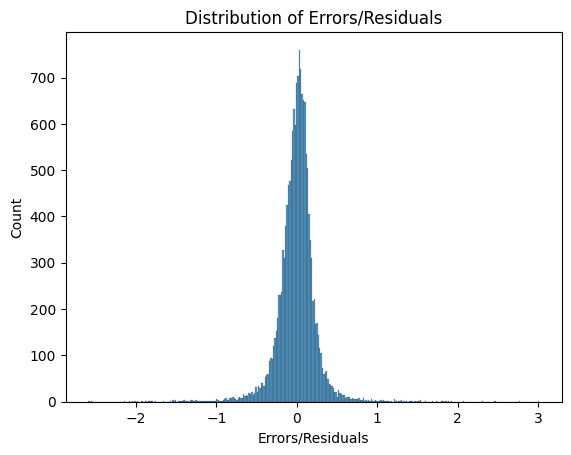

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(errors)

plt.xlabel("Errors/Residuals")
plt.title("Distribution of Errors/Residuals")
plt.show()

In [19]:
from scipy import stats

res=stats.shapiro(errors)
res.statistics

0.8526061177253723

the result stastics should be as close to 1 as possible

No Heteroscedasticity:

In [20]:
y_pred

array([-0.35451124, -0.47641416, -0.35993235, ...,  0.39839827,
        2.56437261, -0.07664488])

In [21]:
errors

3443     0.024159
16090    0.056984
11070    0.101259
19214   -0.042232
17843    0.031546
           ...   
1099    -0.328747
18898   -0.048186
11798    0.055009
6637     0.003227
2575     0.271080
Name: selling_price, Length: 15856, dtype: float64

Text(0.5, 1.0, 'Train Values vs Residuals')

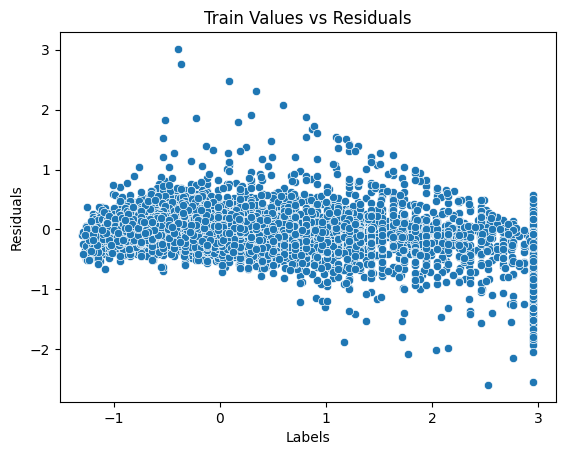

In [23]:
sns.scatterplot(x=y_train,y=errors)
plt.xlabel("Labels")
plt.ylabel("Residuals")
plt.title("Train Values vs Residuals")

In [26]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
list(zip(name, test))

[('F statistic', 0.9910248888400963), ('p-value', 0.6557637501756873)]

Null: Homoscedasticity

as P value not less than 0.05 we fail to reject to Null Hypothesis
(There is no significant evidance to reject null hypothesis)

- F Stats value close to Zero i.e. No Difference in variation among two sides
- P-Value <=0.95: Fail to reject Null hypothesis

### Polynomial Regression:

In [32]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [33]:
df.shape

(19820, 18)

In [35]:
#df.sample(n=df.shape[1])

In [36]:
import numpy as np
import matplotlib.pyplot as plt

X=np.random.rand(50,1)
y = 0.7*(X**5) - 2.1*(X**4)+3.5*(X**2)+2.7*(X**3)+0.3*X+ 0.5

print(X.shape, y.shape)

(50, 1) (50, 1)


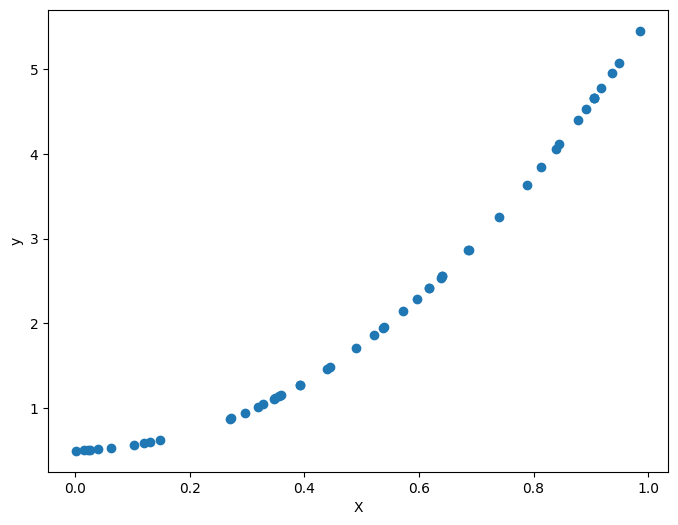

In [38]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [62]:
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

In [63]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [64]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)

preds=model.predict(X)

r2_score=r2_score(y,preds)
print("Adj R2_score",adj_r(r2_score,X,y))

Adj R2_score 0.9238149462228229


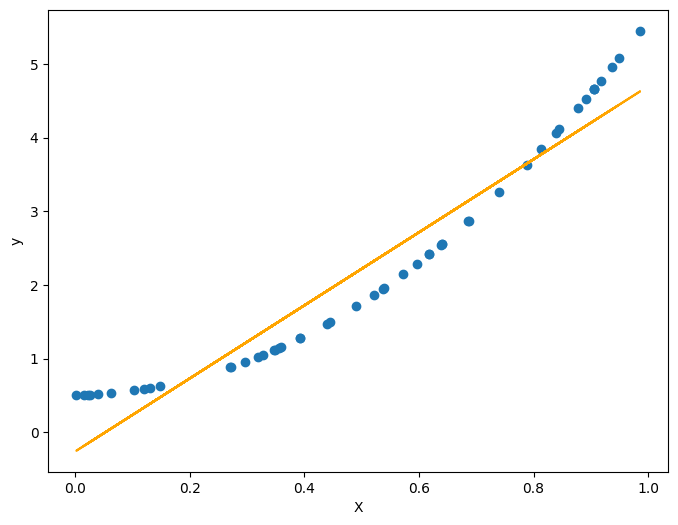

In [65]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,y)
plt.plot(X,preds, label = "Predictions", color="Orange")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Let's Add X2 as feature

In [66]:
X_deg2 = np.hstack([X,X**2])


model_deg2=LinearRegression()
model_deg2.fit(X_deg2,y)

preds=model_deg2.predict(X_deg2)

r2_score=model_deg2.score(X_deg2,y)
print("Adj R2_score",adj_r(r2_score,X,y))

Adj R2_score 0.9999672105920347


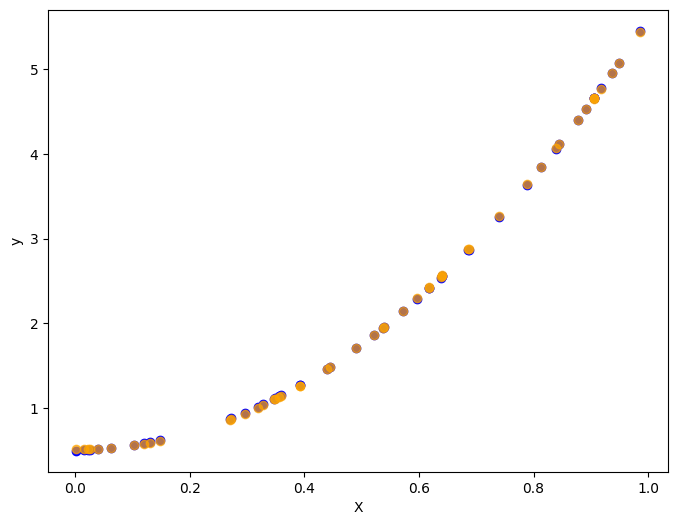

In [73]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X,y, color="blue")
plt.scatter(X,preds, label = "Predictions", color="Orange", alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

- Polynomial Futures using SKLearn

In [75]:
 #creates polynomial feature
from sklearn.preprocessing import PolynomialFeatures

degree=2
pol_t=PolynomialFeatures(degree)
print("Orig Shape:", X.shape)
X_poly = pol_t.fit_transform(X)
print("After Transformation Shape:", X_poly.shape)

Orig Shape: (50, 1)
After Transformation Shape: (50, 3)


```
x1
x1,x1^2,x^0(1)
```

```
Question:

Features: x1, and x2

Degree 3
Output Features: x1,x2**2,x1*x2.........
```

In [79]:
X=np.random.rand(50,1)
y = 3.5*(X**2)+2.7*(X**3)+0.3*X+ 0.5

print(X.shape, y.shape)

(50, 1) (50, 1)


Adj. R-square for Model Degree1: 0.9143367793183835


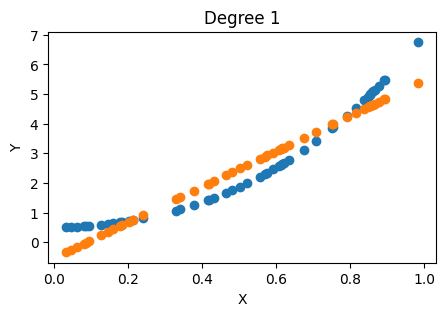

Adj. R-square for Model Degree2: 0.9994610362800477


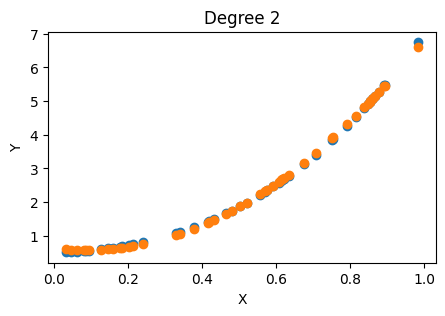

Adj. R-square for Model Degree3: 1.0


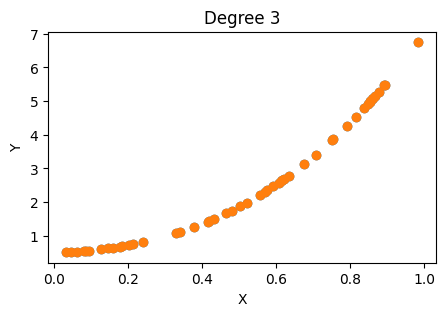

Adj. R-square for Model Degree4: 1.0


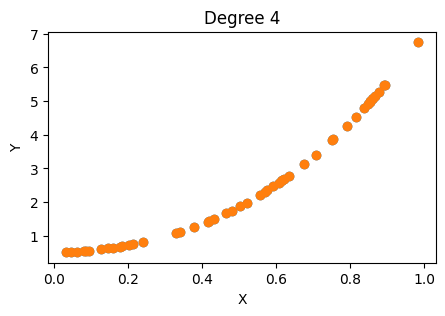

Adj. R-square for Model Degree5: 1.0


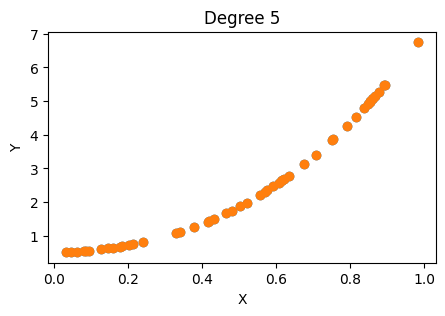

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for degree in range(1, 6):

    #creates polynomial feature
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    print(f'Adj. R-square for Model Degree{degree}: {adj_r(model.score(X_poly_scaled,y),X_poly_scaled,y )}' )

    fig = plt.figure(figsize=(5,3))
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {degree}")
    plt.show()

### Divide the datset into Train and Test Split and Monitor Test Performance:

Bias Variance

Overfitting vs UnderFitting

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

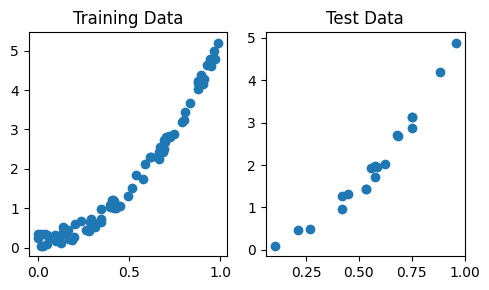

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 3))

# Plot 1: Training data
axs[0].scatter(X_train, y_train)
axs[0].set_title("Training Data")


# Plot 2: Testing data
axs[1].scatter(X_test, y_test)
axs[1].set_title("Test Data")


# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### make_pipeline: SkLearn
We will use make_pipeline to perform all three steps i.e. Polynomial Feauture, Scaling and Linear Regression in single line of code


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degrees = 100 # number of data-points
train_scores = []
test_scores = []
scaler = StandardScaler()

for degree in range(1, degrees):

    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    train_score = polyreg_scaled.score(X_train, y_train)
    test_score = polyreg_scaled.score(X_test, y_test)

    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

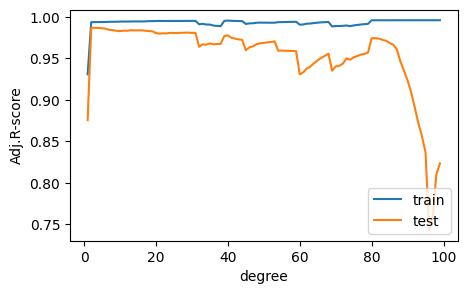

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(list(range(1, 100)), train_scores, label="train")
plt.plot(list(range(1, 100)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Adj.R-score")
plt.show()